# Implementing a Neural Network using NUMPY

## Dataset using 0s and 1s

In [1]:
# Creating data set

# A
a =[0, 0, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   1, 1, 1, 1, 1, 1,
   1, 0, 0, 0, 0, 1,
   1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0]

# Creating labels
y =[[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1]]

## Visualizing Dataset

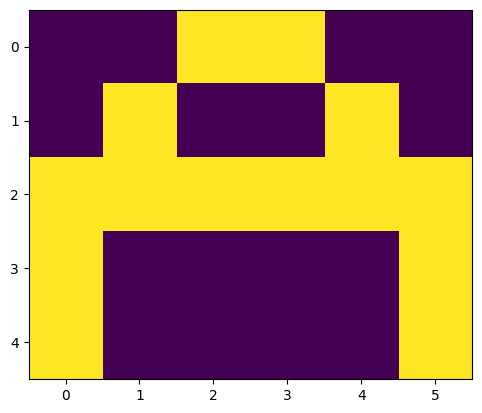

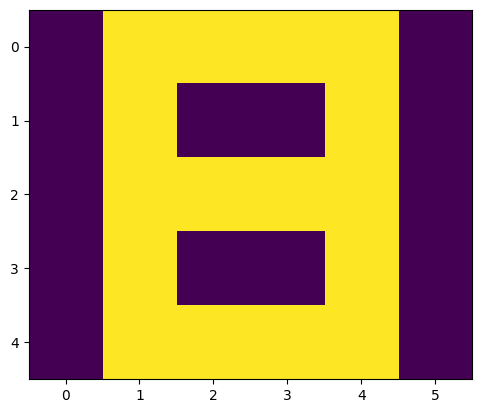

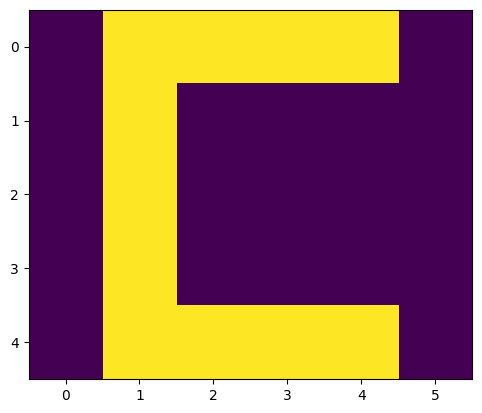

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# visualizing the data, plotting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()

# visualizing the data, plotting A.
plt.imshow(np.array(b).reshape(5, 6))
plt.show()

# visualizing the data, plotting A.
plt.imshow(np.array(c).reshape(5, 6))
plt.show()

## Converting dataset into numpy array

In [3]:
# converting data and labels into numpy array
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30),
                                np.array(c).reshape(1, 30)]
y = np.array(y)
# Printing data and labels
print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


## Defining architecture

1. Input Layer: 1 layer with 30 nodes (representing the 5x6 grid).
2. Hidden Layer: 1 layer with 5 nodes.
3. Output Layer: 1 layer with 3 nodes (representing the letters A, B, and C).

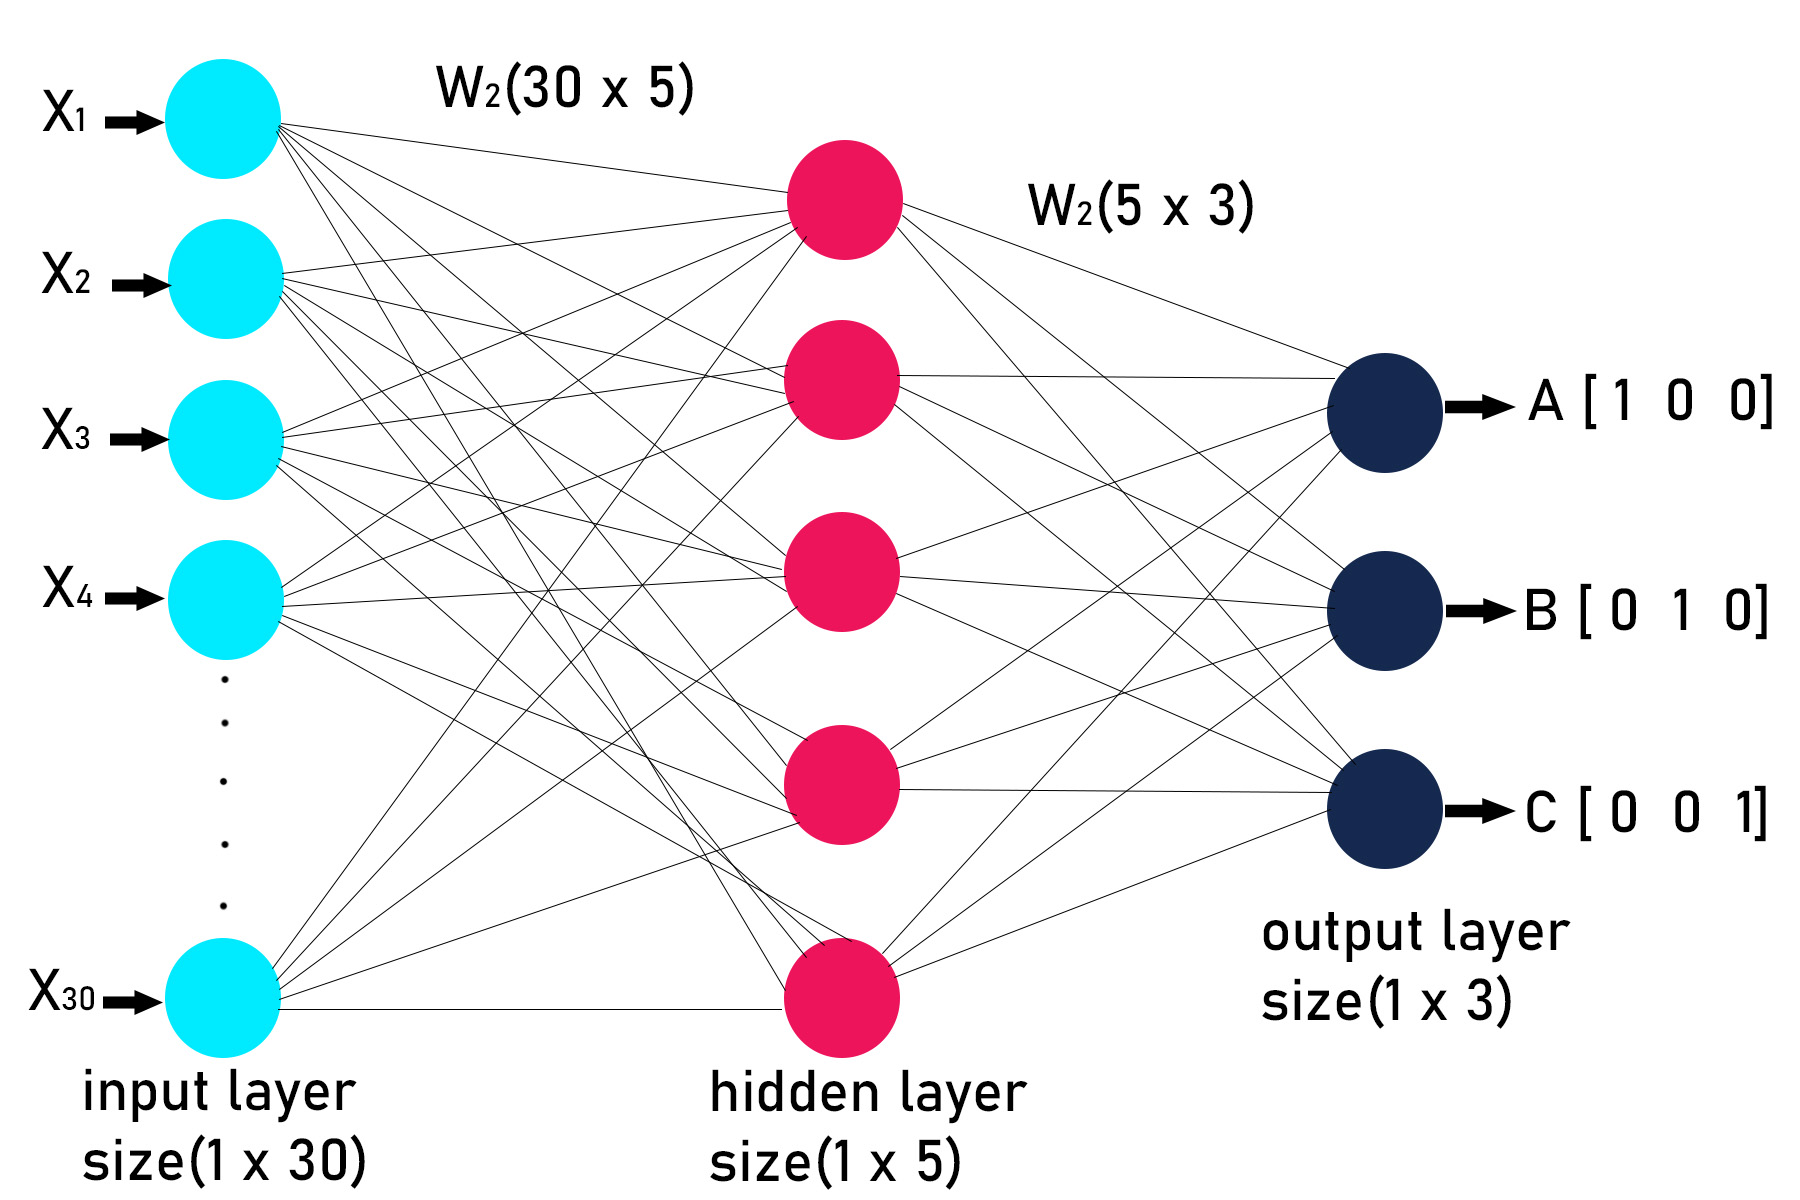

1. Activation Function: We'll use the sigmoid activation function.
2. Feedforward Process: Computes the output by passing the input through the layers.
3. Backpropagation: Updates weights to minimize the loss.
4. Loss Function: We’ll use Mean Squared Error (MSE) to compute the loss.

In [4]:
# activation function
def sigmoid(x):
	return(1/(1 + np.exp(-x)))

# Creating the Feed forward neural network
def f_forward(x, w1, w2):
	# hidden
	z1 = x.dot(w1)    # input from layer 1
	a1 = sigmoid(z1)  # out put of layer 2
	z2 = a1.dot(w2)   # input of out layer
	a2 = sigmoid(z2)  # output of out layer
	return(a2)

# initializing the weights randomly
def generate_wt(x, y):
	li =[]
	for i in range(x * y):
		li.append(np.random.randn())
	return(np.array(li).reshape(x, y))

# for loss we will be using mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

# Back propagation of error
def back_prop(x, y, w1, w2, alpha):

	# hidden layer
	z1 = x.dot(w1)
	a1 = sigmoid(z1)
	z2 = a1.dot(w2)
	a2 = sigmoid(z2)

	# error in output layer
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
								(np.multiply(a1, 1-a1)))
	# Gradient for w1 and w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)

	# Updating parameters
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))

	return(w1, w2)

## Initializing Weights and Training

In [5]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)

def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 60.353304204451284
epochs: 2 ======== acc: 63.072585056475305
epochs: 3 ======== acc: 65.68145367047562
epochs: 4 ======== acc: 68.13002727780089
epochs: 5 ======== acc: 70.36882448825885
epochs: 6 ======== acc: 72.37207220792368
epochs: 7 ======== acc: 74.13842767501251
epochs: 8 ======== acc: 75.68278142620665
epochs: 9 ======== acc: 77.02785839748503
epochs: 10 ======== acc: 78.19864057836946
epochs: 11 ======== acc: 79.21940286039921
epochs: 12 ======== acc: 80.1123735735363
epochs: 13 ======== acc: 80.89724354902884
epochs: 14 ======== acc: 81.5910868526874
epochs: 15 ======== acc: 82.2084805458698
epochs: 16 ======== acc: 82.76172222829702
epochs: 17 ======== acc: 83.26109189589727
epochs: 18 ======== acc: 83.7151254614166
epochs: 19 ======== acc: 84.13087883619345
epochs: 20 ======== acc: 84.51416980179641
epochs: 21 ======== acc: 84.86979130381297
epochs: 22 ======== acc: 85.20169440045788
epochs: 23 ======== acc: 85.51314204297597
epochs: 24 ======== ac

## Plotting the Accuracy and Loss

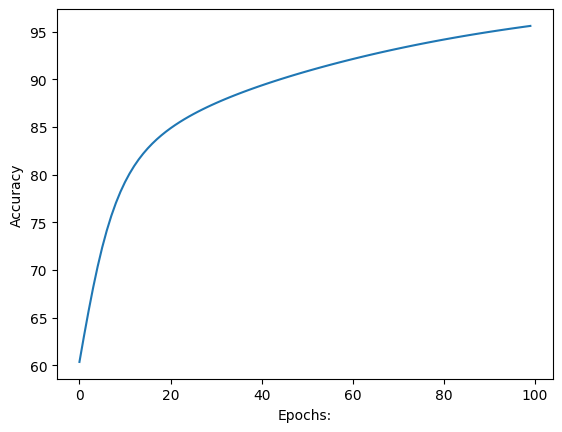

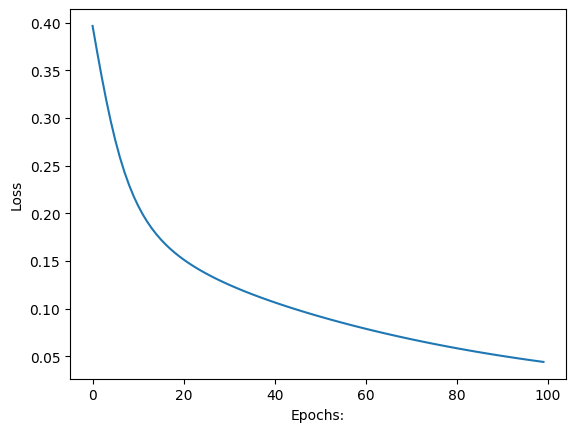

In [7]:
import matplotlib.pyplot as plt1

# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()

# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

## Making Predictions

Image is of letter B.


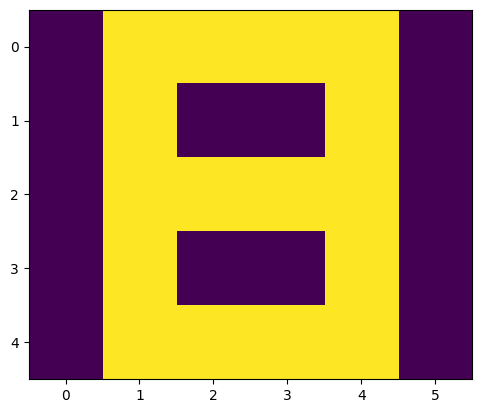

In [8]:
def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of letter A.")
	elif(k == 1):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show()
# Example: Predicting for letter 'B'
predict(x[1], w1, w2)